In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import date as d
from datetime import time as t
from datetime import datetime as dt
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
%matplotlib  
rcParams['figure.figsize'] = 15,7
sb.set_style('whitegrid', )
sb.set(style = 'ticks', color_codes=True)

Using matplotlib backend: Qt5Agg


In [4]:
df = pd.read_csv('iris.data.csv', sep=',', header=None)
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.dtypes

Sepal Length    float64
Sepal Width     float64
Petal Length    float64
Petal Width     float64
Species          object
dtype: object

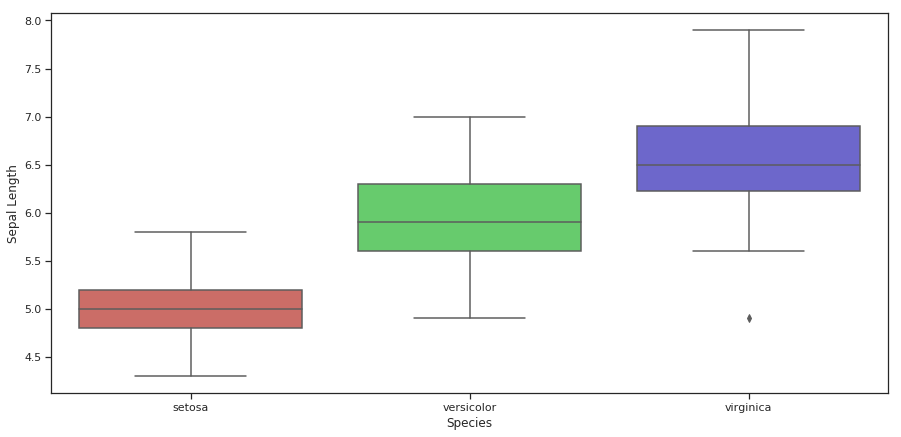

In [128]:
sb.boxplot(x='Species', y='Sepal Length', data=df, palette='hls')

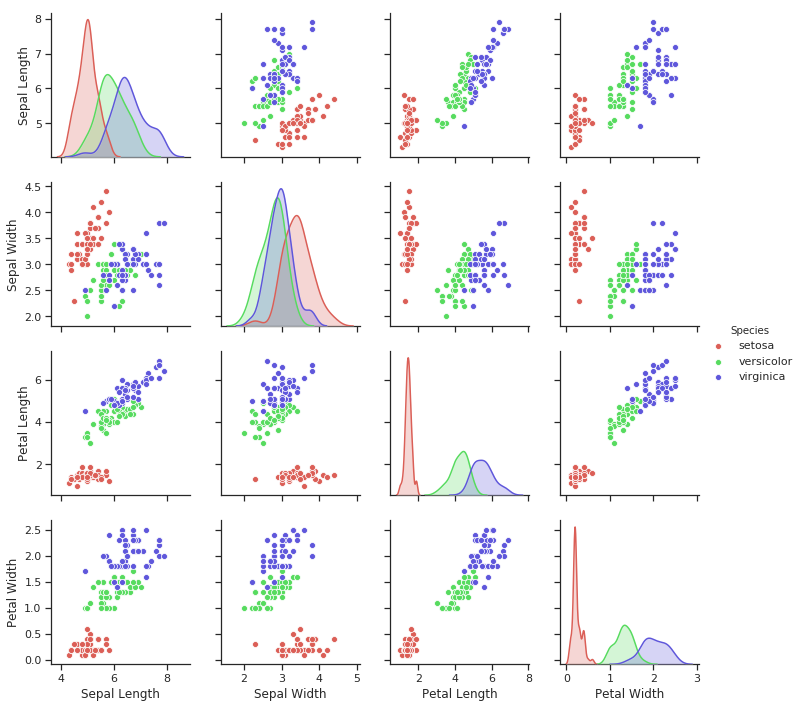

In [129]:
sb.pairplot(df, hue='Species', palette='hls')

# DBSCAN for collective outliers 

In [35]:
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

data = df[['Sepal Length','Sepal Width','Petal Length','Petal Width']]

In [36]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=None, p=None)


In [37]:
print(Counter(model.labels_))
print(data[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
     Sepal Length  Sepal Width  Petal Length  Petal Width
98            5.1          2.5           3.0          1.1
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


Text(0.5, 1.0, 'DBSCAN for outliers detection')

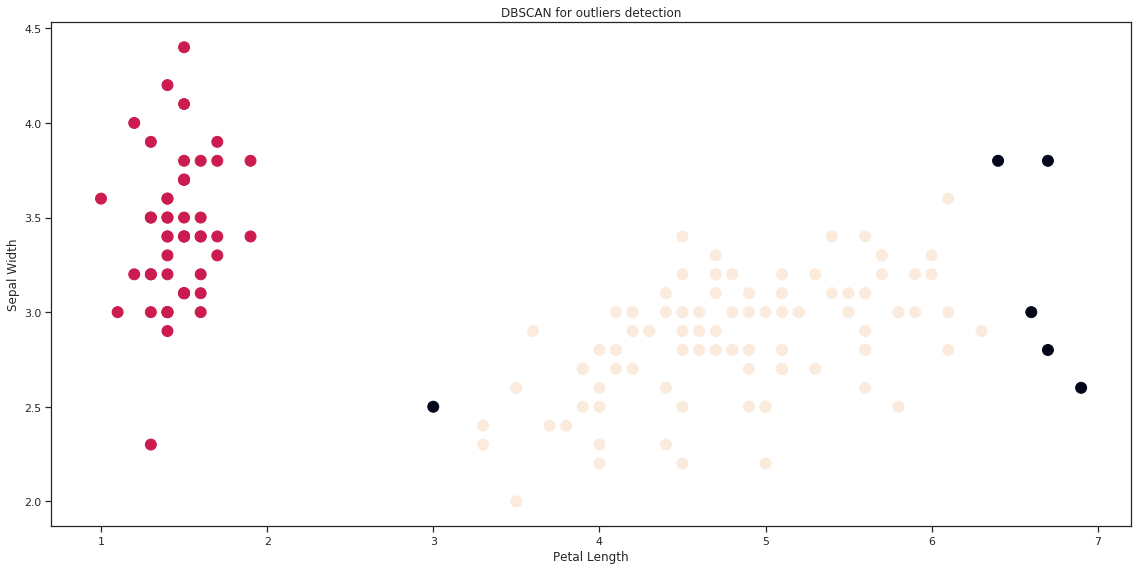

In [130]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
color = model.labels_
ax.scatter(data['Petal Length'], data['Sepal Width'], c=color, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for outliers detection')

# K-Means Clustering 

In [47]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as mtr
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
iris = datasets.load_iris()
x=scale(iris.data)
y=pd.DataFrame(iris.target)
variable_names = iris.feature_names
#print(y)
#print(variable_names)

In [54]:
cls = KMeans(n_clusters=3, random_state=5)
cls.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [56]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns=['Target']

Text(0.5, 1.0, 'KMeans classification')

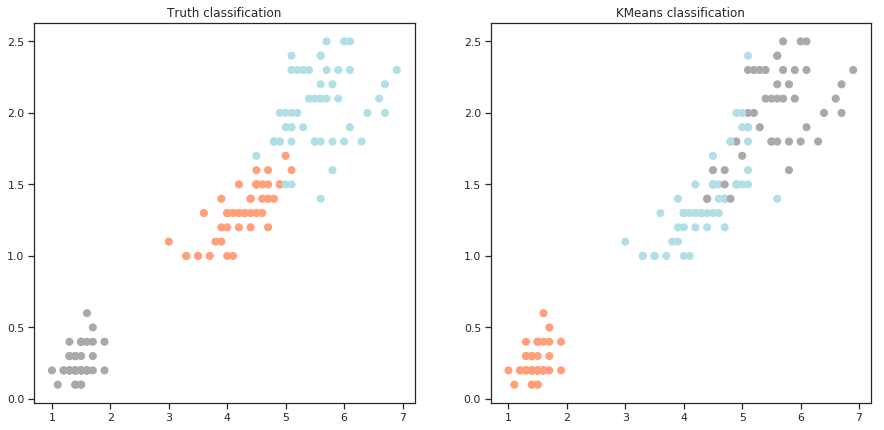

In [131]:
col = np.array(['darkgray', 'lightsalmon','powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length , y=iris_df.Petal_Width, c=col[iris.target], s=50)
plt.title('Truth classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length , y=iris_df.Petal_Width, c=col[cls.labels_], s=50)
plt.title('KMeans classification')

Text(0.5, 1.0, 'KMeans classification')

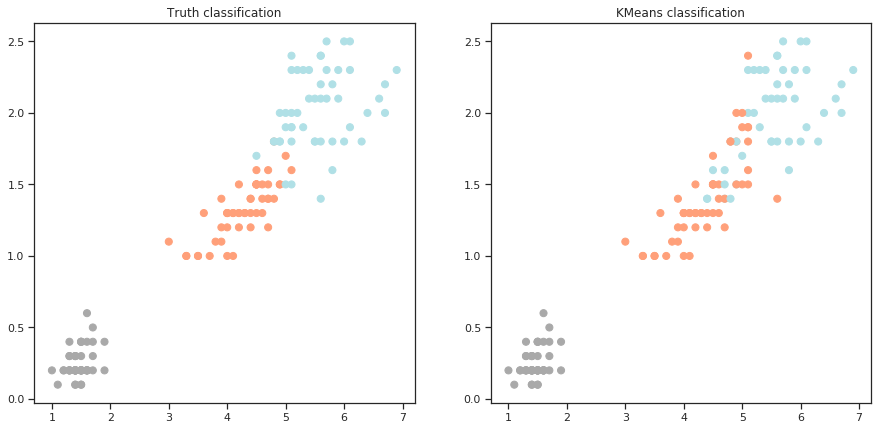

In [132]:
relabel = np.choose(cls.labels_,[2,0,1]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length , y=iris_df.Petal_Width, c=col[iris.target], s=50)
plt.title('Truth classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length , y=iris_df.Petal_Width, c=col[relabel], s=50)
plt.title('KMeans classification')

In [74]:
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

   micro avg       0.83      0.83      0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



# Hierarchical clustering 

In [9]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as mtr

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-whitegrid')

In [10]:
df_mtcars = pd.read_csv('mtcars.csv')

In [11]:
df_mtcars.rename(columns={'model': 'car_names'}, inplace=True)

In [12]:
df_mtcars.dtypes

car_names     object
mpg          float64
cyl            int64
disp         float64
hp             int64
drat         float64
wt           float64
qsec         float64
vs             int64
am             int64
gear           int64
carb           int64
dtype: object

In [107]:
x= df[['mpg','disp','hp','wt']].values
y=df['am'].values

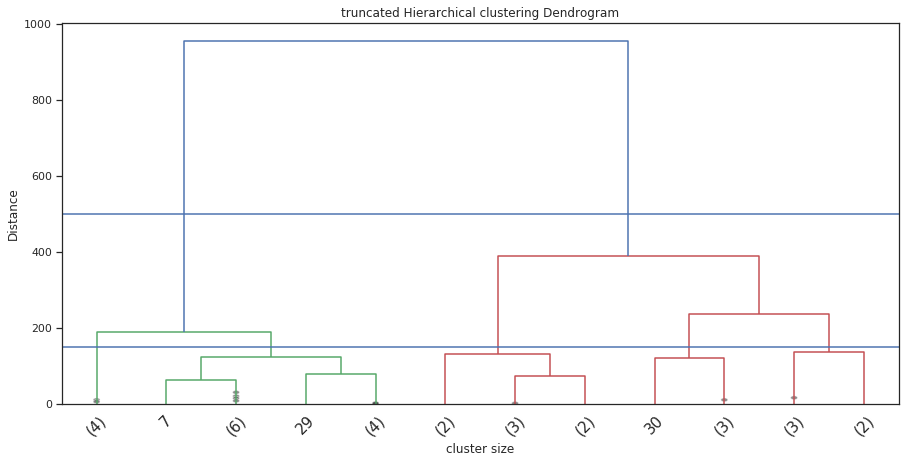

In [134]:
whc = linkage(x,'ward')
dendrogram(whc, truncate_mode='lastp', p=12, leaf_rotation=45,leaf_font_size=15,show_contracted=True)
plt.title('truncated Hierarchical clustering Dendrogram')
plt.xlabel('cluster size')
plt.ylabel('Distance')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()


# Generating hierarchical clusters 

In [111]:
k=2
H_cls = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
H_cls.fit(x)
mtr.accuracy_score(y,H_cls.labels_)

0.78125

In [112]:
H_cls = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
H_cls.fit(x)
mtr.accuracy_score(y,H_cls.labels_)

0.4375

In [113]:
H_cls = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
H_cls.fit(x)
mtr.accuracy_score(y,H_cls.labels_)

0.78125

In [114]:
H_cls = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
H_cls.fit(x)
mtr.accuracy_score(y,H_cls.labels_)

0.71875

# Instance-based learning with K-Nearest Neighbour

In [118]:
import numpy as np
import pandas as pd 
import scipy

import urllib

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [119]:
x_scale = preprocessing.scale(x)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=.33, random_state=17)

In [121]:
KN_clf = neighbors.KNeighborsClassifier()
KN_clf.fit(X_train,y_train)
print(KN_clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [122]:
y_expect = y_test
y_pred = KN_clf.predict(X_test)

print(metrics.classification_report(y_expect,y_pred))



              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.67      0.80         6

   micro avg       0.82      0.82      0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11

